In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("Linear_X_Train.csv")
Y = pd.read_csv("Linear_Y_Train.csv")

In [3]:
x = X.values
y = Y.values
x = x.reshape((-1,))
y = y.reshape((-1,))

print(x.shape, y.shape)

(3750,) (3750,)


-0.03779466168006855 0.9920801322508517


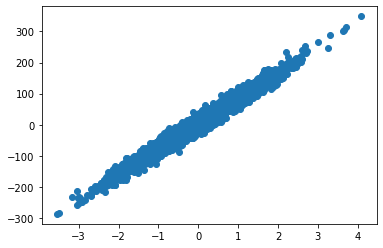

In [4]:
plt.scatter(x,y)
print(x.mean() , x.std())
#data already standarised
x_train = (x-x.mean())/x.std()
y_train = y


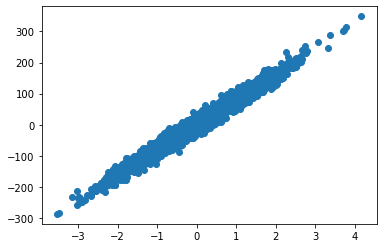

In [5]:
plt.scatter(x_train,y_train)

In [6]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [7]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

In [8]:
def gradient(x,theta,y):
    m = x.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
        
    return grad/m

In [9]:
def gradient_descent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

In [10]:
final_theta , err_list , theta_list = gradient_descent(x_train,y_train)

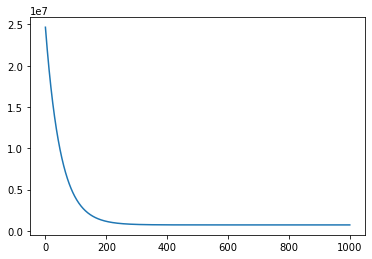

In [13]:
plt.plot(err_list)

In [14]:
print(final_theta)

[ 0.68383944 79.90228731]


In [16]:
X_test = pd.read_csv("Linear_X_Test.csv")
X_test = X_test.values
X_test = X_test.reshape((-1,))
print(X_test.shape)
x_test = X_test

(1250,)


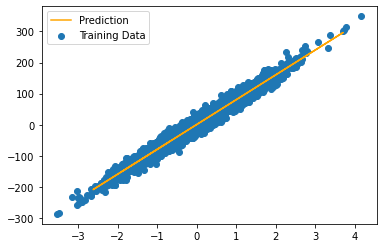

In [17]:
plt.scatter(x_train,y_train,label='Training Data')
plt.plot(x_test,hypothesis(x_test,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
x_train = X.values.reshape((-1,1))
y_train = Y.values.reshape((-1,1))

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
X_test = pd.read_csv("Linear_X_Test.csv")
X_test = X_test.values
x_test = X_test.reshape((-1,1))

In [23]:
output = model.predict(x_test)

In [24]:
bias = model.intercept_
coeff = model.coef_

print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [25]:
model.score(x_train,y_train)

0.9709612233822353

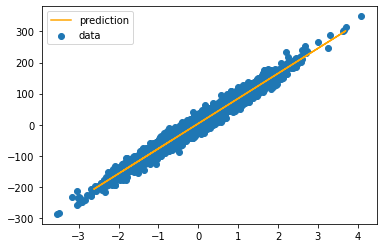

In [26]:
plt.scatter(x_train,y_train,label='data')
plt.plot(x_test,output,color='orange',label='prediction')
plt.legend()
plt.show()
